Initial Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values Before:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin      

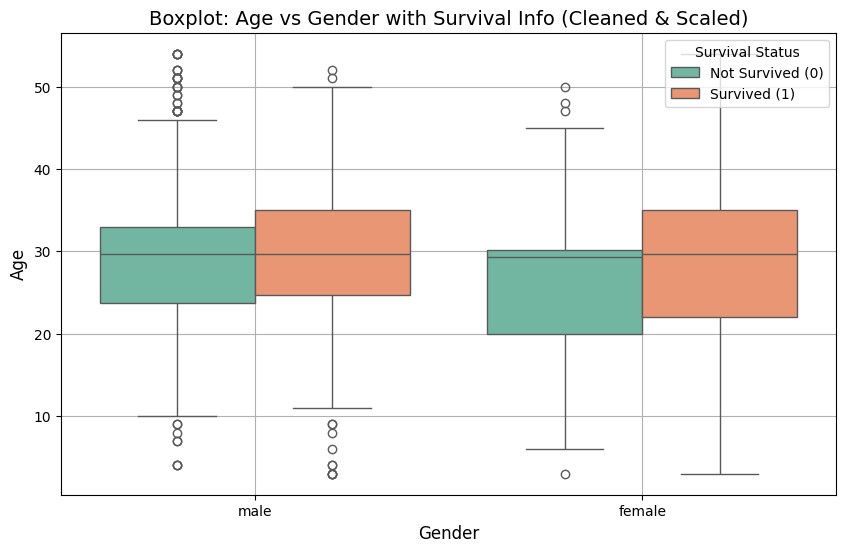

In [3]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Step 2: Load Titanic dataset
data = pd.read_csv('titanic.csv')

# Step 3: Display basic info
print("Initial Info:")
print(data.info())

# Step 4: Check and handle missing values
print("\nMissing Values Before:")
print(data.isnull().sum())

data['Age'] = data['Age'].fillna(np.mean(data['Age']))                     # Fill Age with mean
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])             # Fill Cabin with mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])   # Fill Embarked with mode

print("\nMissing Values After:")
print(data.isnull().sum())

# Step 5: Remove outliers from 'Age' using IQR method
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

# Step 6: Normalize the 'Age' column
scaler = MinMaxScaler()
data['Age_normalized'] = scaler.fit_transform(data[['Age']])

# Step 7: Final Box Plot (Age vs Gender + Survival) with proper legend colors
plt.figure(figsize=(10, 6))
box = sns.boxplot(x=data['Sex'], y=data['Age'], hue=data['Survived'], palette='Set2')

# Set plot titles and labels
plt.title('Boxplot: Age vs Gender with Survival Info (Cleaned & Scaled)', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(True)

# Custom legend to match color with "Survived" meaning
handles, labels = box.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Not Survived (0)', 'Survived (1)'], title='Survival Status', loc='upper right')

plt.show()

